In [2]:
import code_assignment_2_guoyuan_liu as utils
import numpy as np
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [110]:
n = 100
q = 2
ns = [0.7, 0.3]
ps = np.array([[0.4, 0.3], [0.3, 0.5]])

g, A = utils.generate_data(n, q, ns, ps, seed=0)

In [111]:
states, energies = utils.run_mcmc(A, ns, ps, 1000, seed=42)

100%|██████████| 1000/1000 [01:27<00:00, 11.38it/s]


In [112]:
overlaps = [] # overlap between the ground truth and the states[t]
fractions = [] # fraction of non-zero of the states[t]
for gt in tqdm(states):
    overlaps.append(utils.overlap(gt, g, ns))
    fractions.append(np.sum(gt != 0)/n)


100%|██████████| 1001/1001 [00:00<00:00, 27065.61it/s]


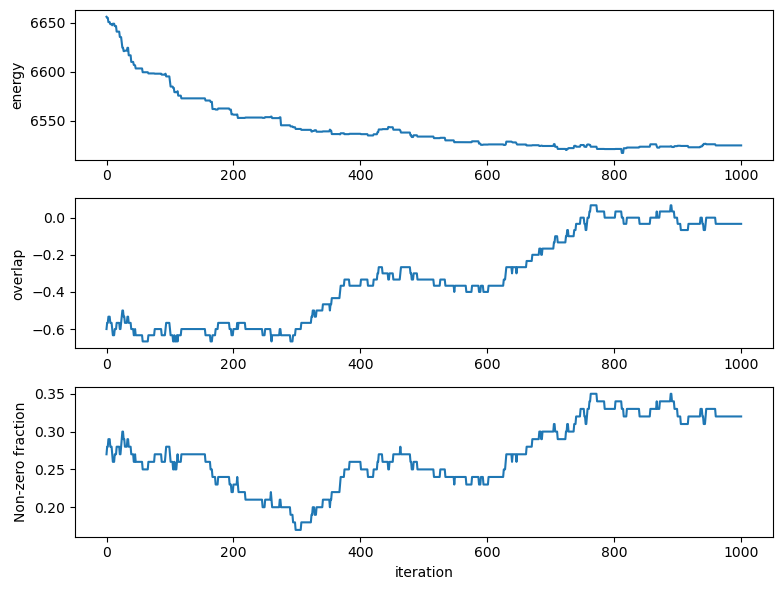

In [113]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(energies)
# ax[0].set_xlabel('iteration')
ax[0].set_ylabel('energy')
ax[1].plot(overlaps)
# ax[1].set_xlabel('iteration')
ax[1].set_ylabel('overlap')
ax[2].plot(fractions)
ax[2].set_xlabel('iteration')
ax[2].set_ylabel('Non-zero fraction')
plt.tight_layout()
# plt.savefig("./q5_states_small_pab.pdf")
plt.savefig("./q5_states.pdf")

In [88]:
np.sum(states[-1] == 1)

37

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:42<00:00, 11.78it/s]


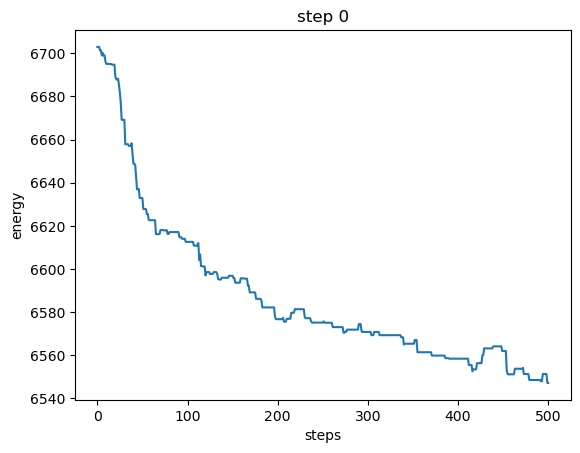

100%|██████████| 500/500 [00:43<00:00, 11.58it/s]


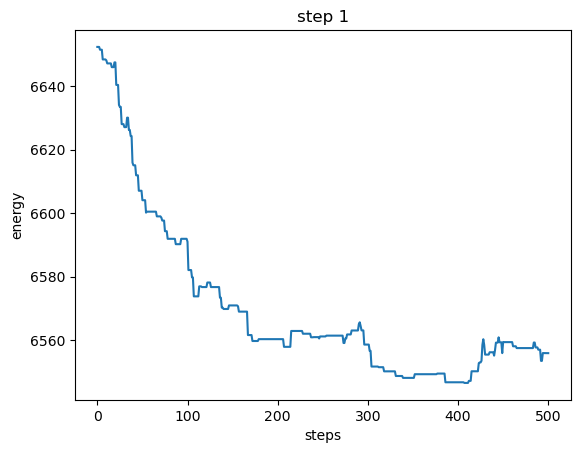

100%|██████████| 500/500 [00:43<00:00, 11.45it/s]


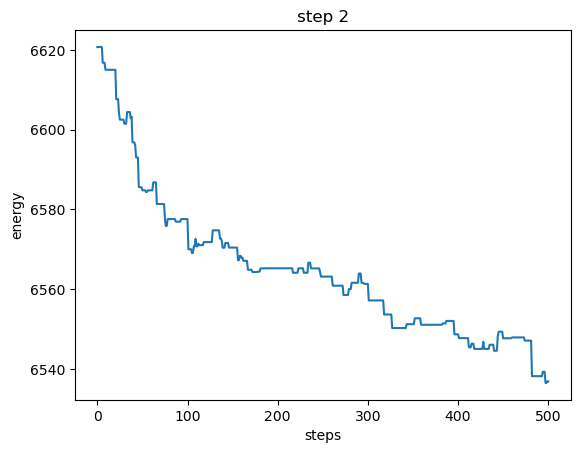

100%|██████████| 500/500 [00:42<00:00, 11.72it/s]


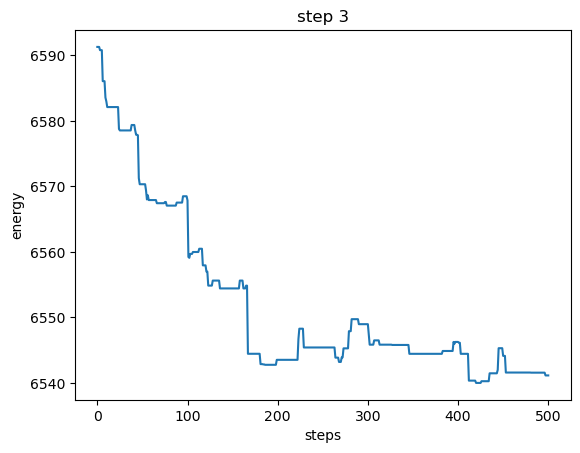

100%|██████████| 500/500 [00:41<00:00, 12.13it/s]


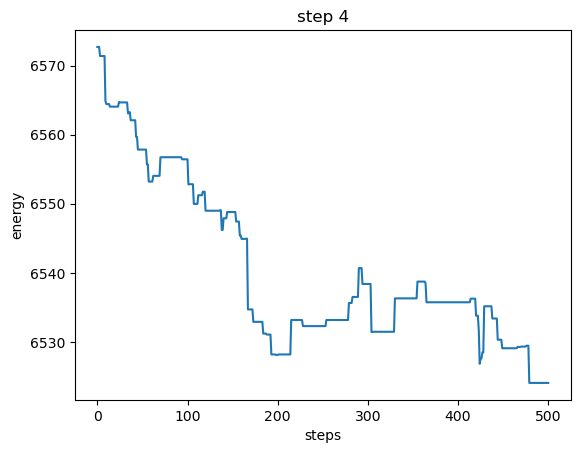

100%|██████████| 500/500 [00:43<00:00, 11.56it/s]


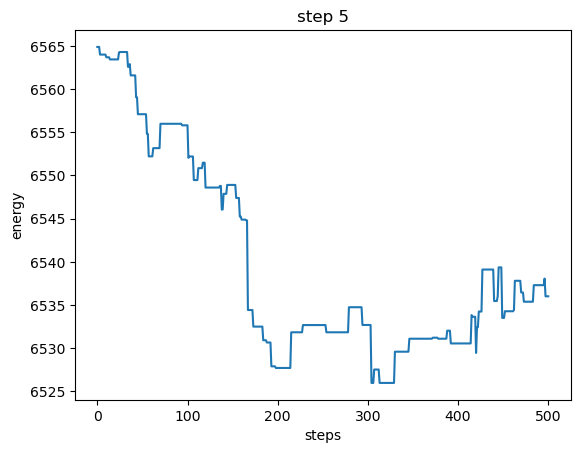

100%|██████████| 500/500 [00:42<00:00, 11.76it/s]


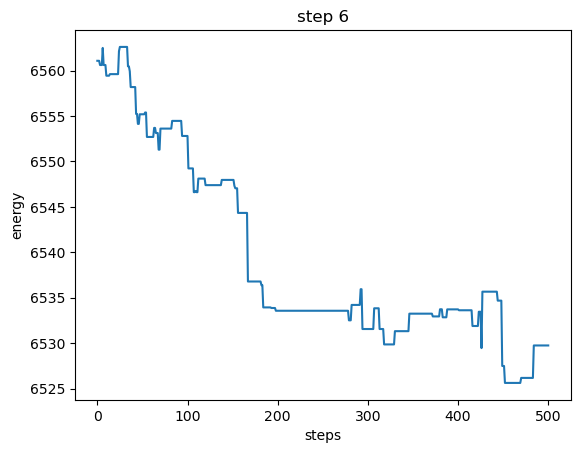

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


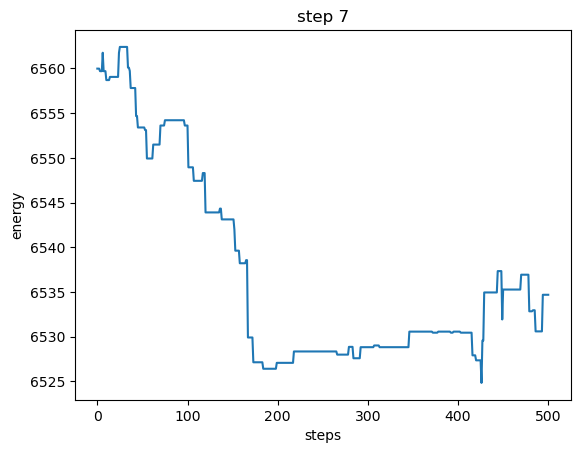

100%|██████████| 500/500 [00:42<00:00, 11.70it/s]


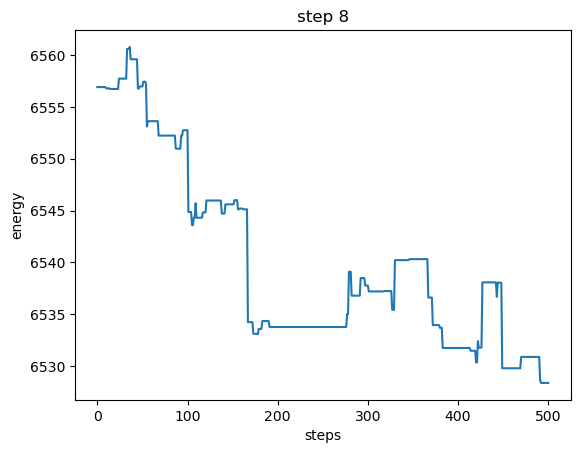

100%|██████████| 500/500 [00:42<00:00, 11.72it/s]


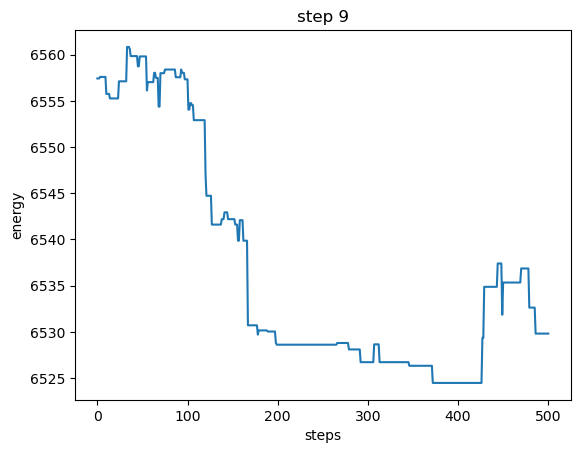

In [114]:
ns_history = utils.run_expectation_maximization(A, [0.55, 1-0.55], ps, 500, 10, seed=42)

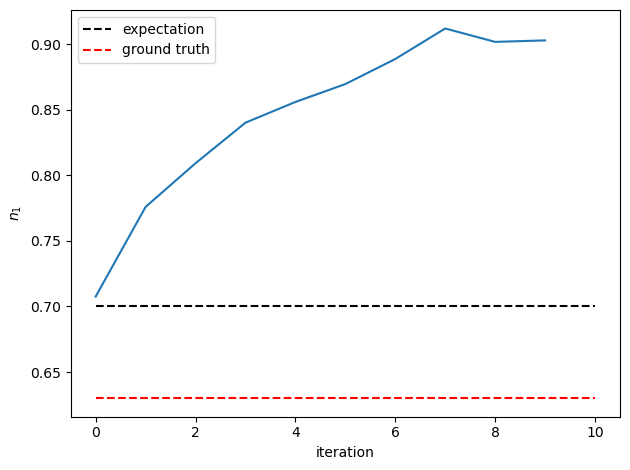

In [115]:
n0_history = [ns_history[i][0] for i in range(len(ns_history))]
plt.plot(n0_history)
plt.xlabel('iteration')
plt.ylabel(r'$n_1$')
plt.plot([0, len(n0_history)], [0.7, 0.7], 'k--', label='expectation')
g_real = np.sum(g==0)/n
plt.plot([0, len(n0_history)], [g_real, g_real], 'r--', label='ground truth')
plt.legend()
plt.tight_layout()
# plt.savefig("./q6_runs_small_pab.pdf")

In [85]:
n0_history

[0.3900000000000004,
 0.38000000000000017,
 0.38000000000000017,
 0.38000000000000017,
 0.38000000000000017,
 0.38000000000000017,
 0.38000000000000017,
 0.38000000000000017,
 0.38000000000000017,
 0.38000000000000017]